# Model Comparison Challenge

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors
import seaborn as sns
from scipy import stats
import math
%matplotlib inline
from sklearn import preprocessing
import statsmodels.formula.api as smf
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm 
import matplotlib.pyplot as plt 
from statsmodels.sandbox.regression.predstd import wls_prediction_std 
from statsmodels.iolib.table import (SimpleTable, default_txt_fmt)

The following data set was taken from https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009/data

In [3]:
win = pd.read_csv('C:\\Users\\cocob\\Downloads\\winequality-red.csv', encoding = "ISO-8859-1")

## Data Description

In [5]:
win.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
win.columns.values

array(['fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality'], dtype=object)

## Data Transformation

In [23]:
win2=win[win['quality'] > 6.99999]
X = pd.DataFrame(win2.density)
y = win2.alcohol

In [33]:
from sklearn import linear_model
from sklearn.cross_decomposition import PLSRegression

R-squared regression: 0.34119253659699633


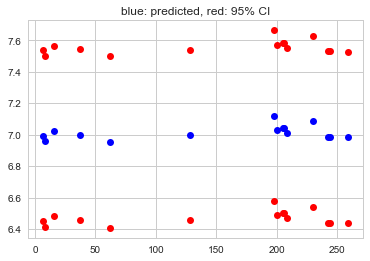

In [30]:
regr = linear_model.LinearRegression()
regr.fit(X, y)

Y_pred = regr.predict(X)
print('R-squared regression:', regr.score(X, y))

linear_formula = 'quality ~ density+pH+alcohol'
lm = smf.ols(formula=linear_formula, data=win2).fit()
prstd, iv_l, iv_u = wls_prediction_std(lm)

plt.figure()
plt.plot(iv_u[0:15], 'o', color='r')
plt.plot(iv_l[0:15], 'o', color='r')
plt.plot(lm.fittedvalues[0:15], 'o', color='b')
plt.title('blue: predicted, red: 95% CI')
plt.show()

### OLS Regression

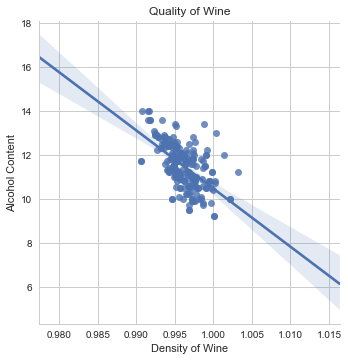

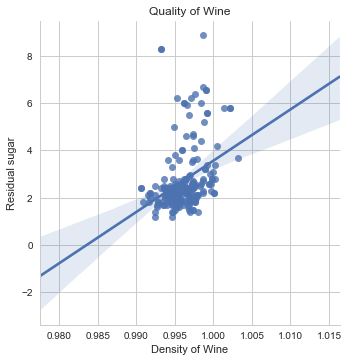

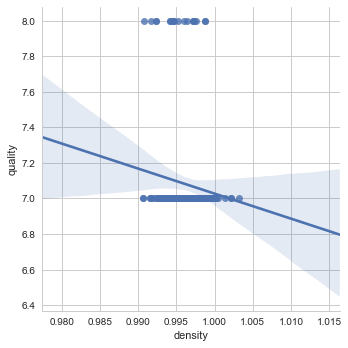

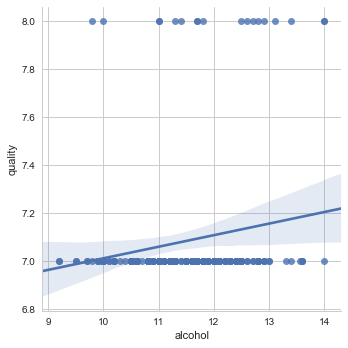

In [66]:
sns.set(style= 'whitegrid')
win3=sns.lmplot(x='density', y='alcohol', data=win2, fit_reg=True)
win3.set_xlabels('Density of Wine')
win3.set_ylabels('Alcohol Content')
plt.title('Quality of Wine')
plt.show()

win6=sns.lmplot(x='density', y='residual sugar', data=win2, fit_reg=True)
win6.set_xlabels('Density of Wine')
win6.set_ylabels('Residual sugar')
plt.title('Quality of Wine')
plt.show()

win4=sns.lmplot(x='density', y='quality', data=win2, fit_reg=True)
plt.show()

win5=sns.lmplot(x='alcohol', y='quality', data=win2, fit_reg=True)
plt.show()

### KNN Regression

In [7]:
from sklearn import neighbors

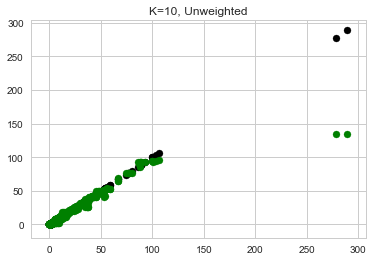

In [59]:
knn = neighbors.KNeighborsRegressor(n_neighbors=10)
x = np.array(win2, win2['density'])
Y = np.array(win2, win2['quality'])
knn.fit(x, Y)

#T = np.arange(7, 8, 1)[:, np.newaxis]

Y_ = knn.predict(Y)


plt.scatter(x, Y, c='k', label='data')
plt.scatter(x, Y_, c='g', label='prediction')
plt.title('K=10, Unweighted')
plt.show()

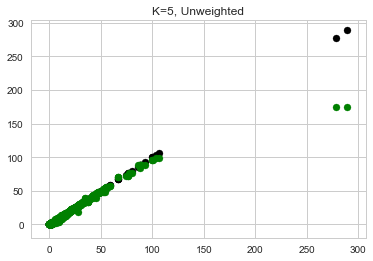

In [64]:
knn = neighbors.KNeighborsRegressor(n_neighbors=5)
x = np.array(win2, win2['density'])
Y = np.array(win2, win2['quality'])
knn.fit(x, Y)

#T = np.arange(7, 8, 1)[:, np.newaxis]

Y_ = knn.predict(Y)


plt.scatter(x, Y, c='k', label='data')
plt.scatter(x, Y_, c='g', label='prediction')
plt.title('K=5, Unweighted')
plt.show()

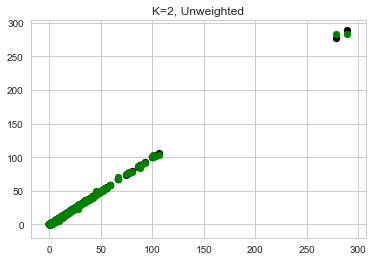

In [67]:
knn = neighbors.KNeighborsRegressor(n_neighbors=2)
x = np.array(win2, win2['alcohol'])
Y = np.array(win2, win2['quality'])
knn.fit(x, Y)

#T = np.arange(7, 8, 1)[:, np.newaxis]

Y_ = knn.predict(Y)


plt.scatter(x, Y, c='k', label='data')
plt.scatter(x, Y_, c='g', label='prediction')
plt.title('K=2, Unweighted')
plt.show()

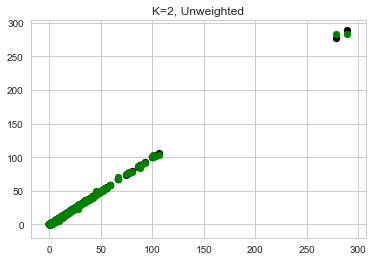

In [77]:
knn = neighbors.KNeighborsRegressor(n_neighbors=2)
x = np.array(win2, win2['residual sugar'])
Y = np.array(win2, win2['quality'])
knn.fit(x, Y)

#T = np.arange(7, 8, 1)[:, np.newaxis]

Y_ = knn.predict(Y)


plt.scatter(x, Y, c='k', label='data')
plt.scatter(x, Y_, c='g', label='prediction')
plt.title('K=2, Unweighted')
plt.show()

In [78]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(knn, x, Y, cv=5)
print("KNN Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))
score_ols = cross_val_score(regr, X, y, cv=5)
print("OLS Accuracy: %0.2f (+/- %0.2f)" % (score_w.mean(), score_w.std() * 2))

KNN Accuracy: 0.89 (+/- 0.35)
OLS Accuracy: 0.88 (+/- 0.38)
